# Prediction model for profit of 50 startups data using Multiple Linear Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
data=pd.read_csv('E:/Top Mentor/3.Class 18.11.23/batch89assignmentsandsolutions/Project - 3&4_Multiple_Reg/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#see the statistics
summary = data.describe()
summary

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
#check the dataset features datatypes
data.dtypes # can see that state is categorical data and other are continuous
# we need to encode the state to numbers since it is categorical data

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
data.isnull().sum() # to check if there are any missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

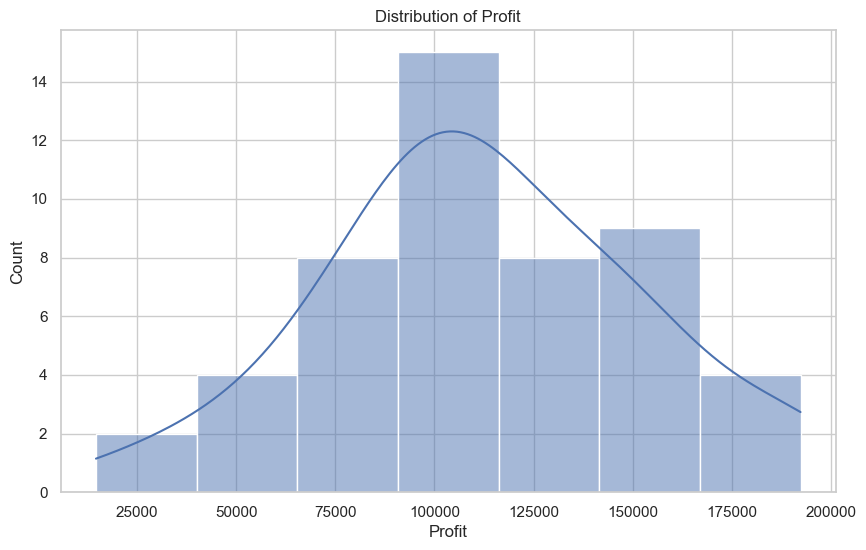

In [6]:
#Some ploting to see the distribution

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], kde=True)
plt.title('Distribution of Profit')
plt.show()



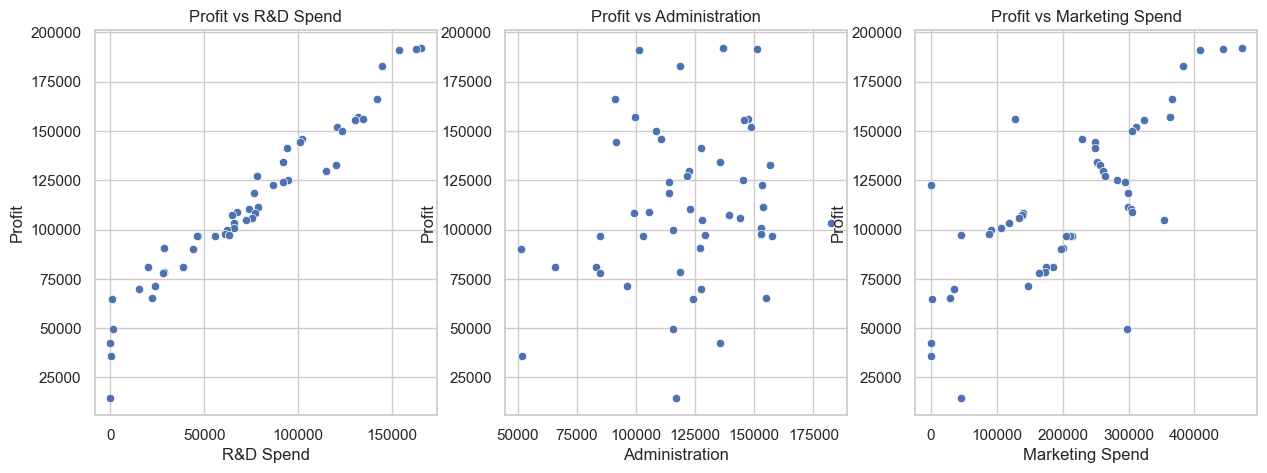

In [7]:
# 2. Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('Profit vs R&D Spend')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Administration', y='Profit', data=data)
plt.title('Profit vs Administration')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.title('Profit vs Marketing Spend')

plt.show()


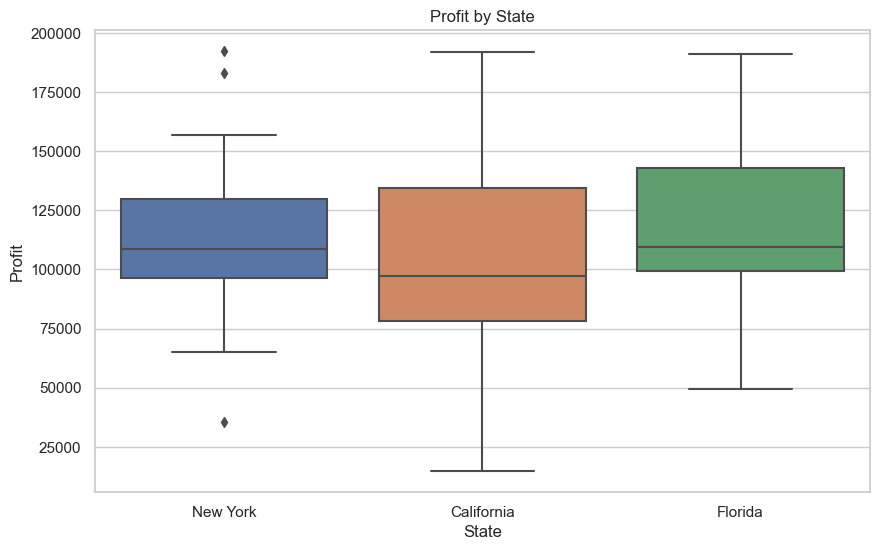

In [8]:
# 3. Boxplot for State vs Profit
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Profit', data=data)
plt.title('Profit by State')
plt.show()



C:\Users\91902\AppData\Local\Temp\ipykernel_5812\2294398644.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


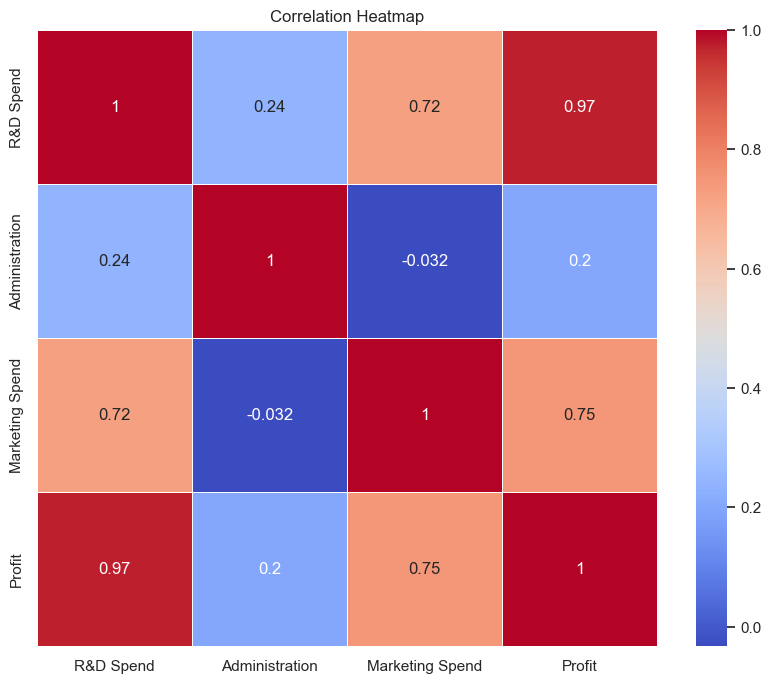

In [9]:
# 4. Heatmap for correlation
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'State' column
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True)

# Split the data into features and target
X = data_encoded.drop('Profit', axis=1)
y = data_encoded['Profit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the encoded data
data_encoded.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Model 1 - R² (Train): {r2_train:.4f}")
print(f"Model 1 - R² (Test): {r2_test:.4f}")

Model 1 - R² (Train): 0.9537
Model 1 - R² (Test): 0.8987


In [12]:
import numpy as np

# Log transform the target variable
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Train the model on log-transformed target
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Make predictions
y_pred_train_log = model_log.predict(X_train)
y_pred_test_log = model_log.predict(X_test)

# Evaluate the model
r2_train_log = r2_score(y_train_log, y_pred_train_log)
r2_test_log = r2_score(y_test_log, y_pred_test_log)

print(f"Model 2 - R² (Train): {r2_train_log:.4f}")
print(f"Model 2 - R² (Test): {r2_test_log:.4f}")

Model 2 - R² (Train): 0.7617
Model 2 - R² (Test): 0.7013
